                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB
None
         

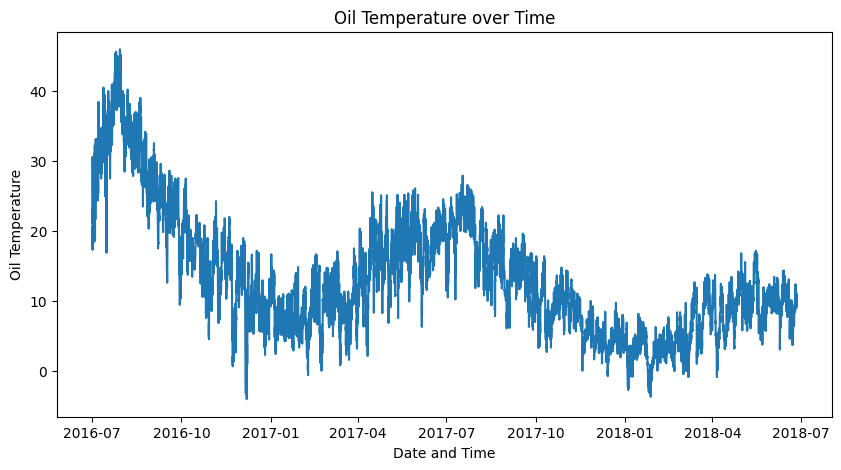

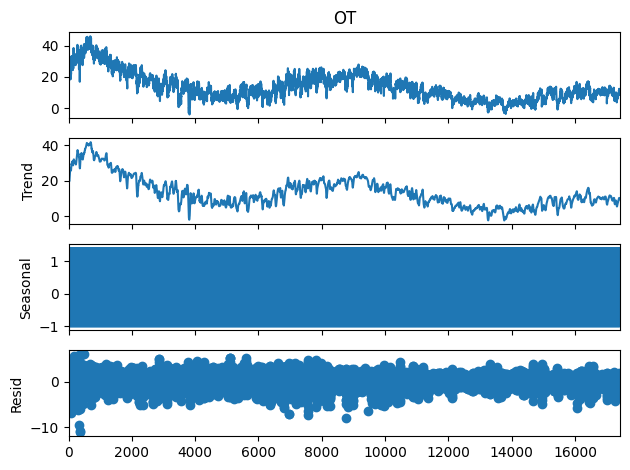

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


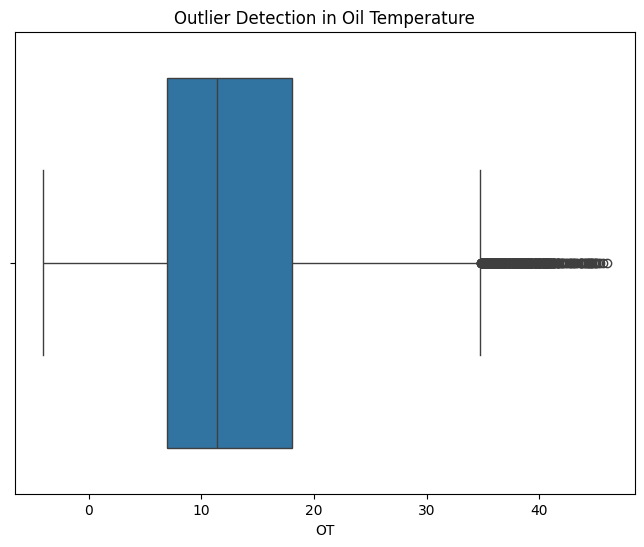

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/ett.csv'  # Update this with your file path if different
data = pd.read_csv(file_path)

# Display the first few rows and check the structure
print(data.head())
print(data.info())
print(data.describe())

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

# Check the conversion
print(data['date'].head())

# Plot oil temperature over time (assuming 'oil_temp' is the correct column for temperature)
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['OT'])
plt.title('Oil Temperature over Time')
plt.xlabel('Date and Time')
plt.ylabel('Oil Temperature')
plt.show()

# Seasonal decomposition (if applicable for daily or monthly data)
decomposition = seasonal_decompose(data['OT'], period=24, model='additive')
decomposition.plot()
plt.show()

# Checking for outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['OT'])
plt.title('Outlier Detection in Oil Temperature')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (example: forward fill)
data.fillna(method='ffill', inplace=True)

# Normalize/Scale the data
scaler = MinMaxScaler()
data['oil_temp_scaled'] = scaler.fit_transform(data[['OT']])

# Feature Engineering: Creating time-based features
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Creating lag features (e.g., past 1-hour and 24-hour lags)
data['oil_temp_lag_1'] = data['OT'].shift(1)
data['oil_temp_lag_24'] = data['OT'].shift(24)

# Creating rolling window features (e.g., 24-hour rolling mean)
data['oil_temp_roll_24'] = data['OT'].rolling(window=24).mean()

# Drop rows with NaN values due to lag/rolling features
data.dropna(inplace=True)


<ipython-input-8-2b0a8f51eeeb>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


MODEL 1 ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

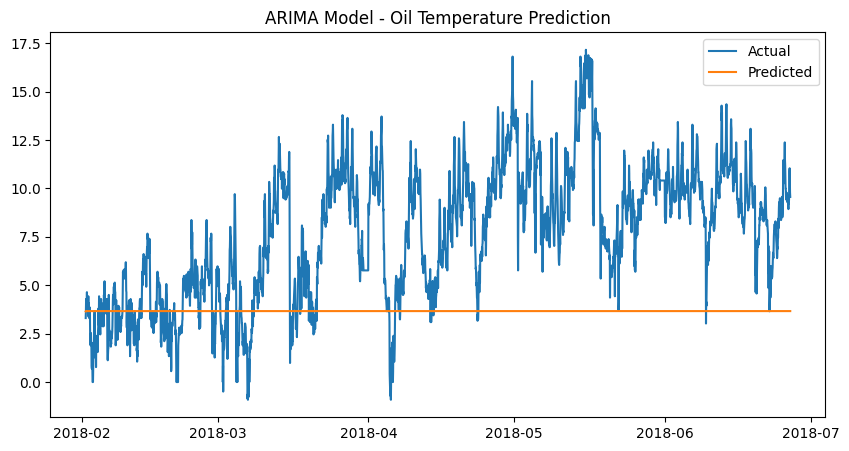

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Using oil_temp as the target variable
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model (example: ARIMA(5,1,0))
model_arima = ARIMA(train['OT'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Predictions
predictions_arima = model_arima_fit.forecast(steps=len(test))
plt.figure(figsize=(10, 5))
plt.plot(test['date'], test['OT'], label='Actual')
plt.plot(test['date'], predictions_arima, label='Predicted')
plt.title('ARIMA Model - Oil Temperature Prediction')
plt.legend()
plt.show()


MODEL 2 LSTM (LONG SHORT TERM MEMORY)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 - 4s - 8ms/step - loss: 0.0064 - val_loss: 9.0888e-04
Epoch 2/10
435/435 - 2s - 4ms/step - loss: 0.0011 - val_loss: 4.9634e-04
Epoch 3/10
435/435 - 1s - 2ms/step - loss: 8.0270e-04 - val_loss: 3.2664e-04
Epoch 4/10
435/435 - 1s - 3ms/step - loss: 7.1528e-04 - val_loss: 2.6937e-04
Epoch 5/10
435/435 - 1s - 3ms/step - loss: 5.8171e-04 - val_loss: 2.4387e-04
Epoch 6/10
435/435 - 2s - 4ms/step - loss: 6.0623e-04 - val_loss: 2.3829e-04
Epoch 7/10
435/435 - 2s - 4ms/step - loss: 5.7161e-04 - val_loss: 2.4804e-04
Epoch 8/10
435/435 - 2s - 4ms/step - loss: 5.4510e-04 - val_loss: 2.9112e-04
Epoch 9/10
435/435 - 1s - 3ms/step - loss: 5.8529e-04 - val_loss: 2.1633e-04
Epoch 10/10
435/435 - 1s - 3ms/step - loss: 5.1853e-04 - val_loss: 2.8625e-04
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


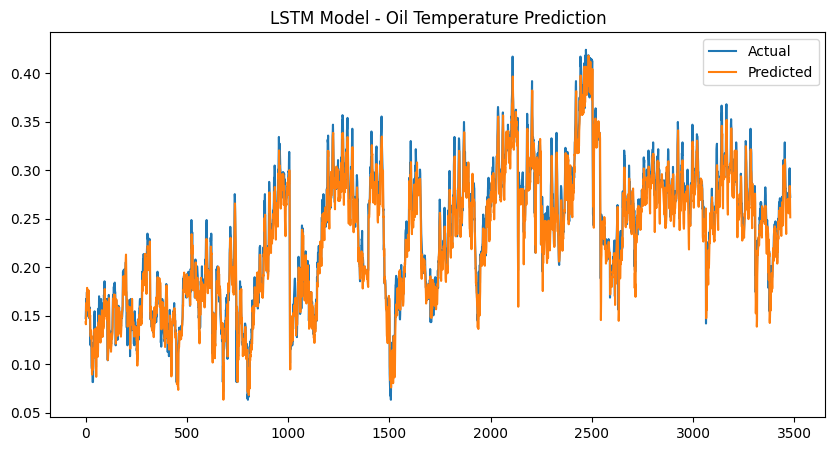

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Creating features and target for LSTM model
features = ['oil_temp_lag_1', 'oil_temp_lag_24', 'oil_temp_roll_24', 'hour', 'day_of_week']
X = data[features].values
y = data['oil_temp_scaled'].values

# Reshaping for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Building LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Training the model
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Predictions
predictions_lstm = model_lstm.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions_lstm, label='Predicted')
plt.title('LSTM Model - Oil Temperature Prediction')
plt.legend()
plt.show()


ARIMA - MAE: 4.437255131141696, MSE: 28.35122404967984, RMSE: 5.324586749192827
LSTM - MAE: 0.012807502538788552, MSE: 0.0002862540973193177, RMSE: 0.016919045402129452


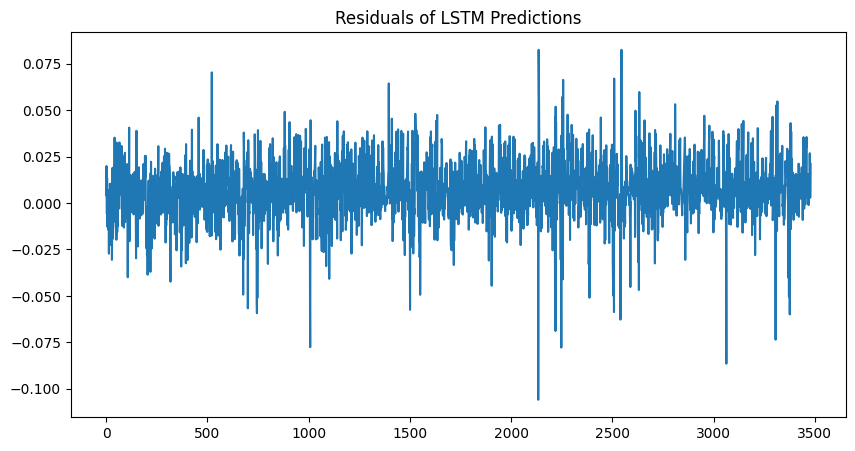

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ARIMA Evaluation
mae_arima = mean_absolute_error(test['OT'], predictions_arima)
mse_arima = mean_squared_error(test['OT'], predictions_arima)
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA - MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}")

# LSTM Evaluation
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
mse_lstm = mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}")

# Visualizing the residuals for LSTM
residuals = y_test - predictions_lstm.flatten()
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of LSTM Predictions')
plt.show()


In [ ]:
# Feature addition: Experiment with more advanced features like past load conditions (if available)
# Hyperparameter tuning: Adjust learning rate, epochs, or batch size
# You can also try more complex architectures like Bidirectional LSTMs, GRU, or stacking models.

# For example, tuning LSTM further:
model_lstm_tuned = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_lstm_tuned.compile(optimizer='adam', loss='mse')

history_tuned = model_lstm_tuned.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Predictions
predictions_lstm_tuned = model_lstm_tuned.predict(X_test)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 - 4s - 20ms/step - loss: 0.0017 - val_loss: 2.8322e-04
Epoch 2/20
218/218 - 1s - 4ms/step - loss: 5.0619e-04 - val_loss: 2.4644e-04
Epoch 3/20
218/218 - 1s - 6ms/step - loss: 4.5738e-04 - val_loss: 2.3152e-04
Epoch 4/20
218/218 - 1s - 5ms/step - loss: 4.6457e-04 - val_loss: 3.0208e-04
Epoch 5/20
218/218 - 1s - 4ms/step - loss: 5.0029e-04 - val_loss: 2.0356e-04
Epoch 6/20
218/218 - 1s - 6ms/step - loss: 5.0741e-04 - val_loss: 2.0288e-04
Epoch 7/20
218/218 - 1s - 6ms/step - loss: 4.3864e-04 - val_loss: 1.9918e-04
Epoch 8/20
218/218 - 1s - 4ms/step - loss: 4.1426e-04 - val_loss: 2.1047e-04
Epoch 9/20
218/218 - 1s - 7ms/step - loss: 4.0748e-04 - val_loss: 2.8198e-04
Epoch 10/20
218/218 - 1s - 6ms/step - loss: 3.9373e-04 - val_loss: 2.4521e-04
Epoch 11/20
218/218 - 2s - 9ms/step - loss: 4.1586e-04 - val_loss: 2.0049e-04
Epoch 12/20
218/218 - 2s - 8ms/step - loss: 4.0060e-04 - val_loss: 1.7516e-04
Epoch 13/20
218/218 - 1s - 6ms/step - loss: 4.0219e-04 - val_loss: 2.0332e-04
Epoch 14/